<style>
table {
    display: inline-block;
    margin-left: 0 !important;
}
</style>

# 120 Years of Olympic Analysis: Data Insights to Medal Predictions

## Table of Contents

1. [**Introduction**](#1)
    - Project Description
    - Data Description
2. [**Data Loading**](#2)
	- Importing Libraries
    - Data Loading
    - Basic Data Exploration
3. [**Data Cleaning**](#3)
4. [**Exploratory Data Analysis**](#4)
    - Country Insights
    - Seasonal Analysis
    - Relationship Analysis
    - South Korean Athlete Spotlight
5. [**Feature Engineering**](#5)
    - Create Binary Target Column for Medals
    - Create Feature to Reduce Multicollinearity
6. [**Data Pre-processing**](#6) 
    - Drop Unnecessary Columns
    - Handle Missing Values
    - Binary and One-hot Encoding
7. [**Model Selection and Training**](#7) 
8. [**Model Evaluation**](#8) 
9. [**Conclusion**](#9) 
    - Insights

# 1

## Introduction


### Project Description

**Goal/Purpose:** 

The Olympic Games, a quadrennial event, have a rich history dating back to ancient Greece. Over the years, thousands of athletes from around the world have competed in various sports, representing their nations and striving for glory. 

By harnessing this data, a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016, I aim to uncover patterns, trends, and insights that might enrich my understanding of the Olympics.

<p>&nbsp;</p>

**Steps:**

- **Exploratory Data Analysis(EDA)**: Undertake a comprehensive EDA to discern the distribution, trends, and relationships within the dataset. This encompasses visualizing distributions of numerical attributes, understanding the medal landscape, and probing into relationships between variables.  
    * **Country Insights**: Analyze the medal distribution across nations, identifying dominant Olympic forces, and understanding the evolving dynamics of medal achievements over the years   
    * **Seasonal Insights**: Explore the distinct narratives of the Summer and Winter Olympics, understanding the shifts in athlete participation, medal counts, and the unique characteristics of each season.  
    * **Side Analysis: Korean Athlete Spotlight**: Delve into Korea's Olympic saga. Investigate the nation's medal tallies, participation patterns, standout sports, and demographic intricacies, aiming to paint a comprehensive picture of Korea's contributions to the Olympic narrative.  
- **Data Cleaning & Pre-processing**: Prime the dataset for rigorous analysis by addressing missing values, eliminating outliers, and refining the feature set. This includes engineering potentially impactful features like BMI.
- **Feature Selection & Engineering**: Navigate deeper into the dataset to handpick influential features and craft new ones that might bolster the predictive model's efficacy.
- **Model Building & Evaluation**: Construct a predictive model using the Random Forest algorithm to estimate an athlete's chances of clinching a medal. Assess the model's accuracy and delve into the importance of each feature in the prediction process.

<p>&nbsp;</p>

### Data Description

**Content:** 

**athlete_events.csv** -> This dataset is a _csv_ file of _271,116_ data points which contains _ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal_. 

**noc_regions.csv** -> This dataset is a _csv_ file of _230_ data points which contains _NOC, region, notes_. 

<p>&nbsp;</p>

**Description of Attributes:** 

**athlete_events.csv**

| Column  | Description |  
| :------ | :---------- |  
| ID      | Unique number for each athlete |  
| Name    | Athlete's name |  
| Sex     | M or F |  
| Age     | Integer |  
| Height  | In centimeters |  
| Weight  | In kilograms |  
| Team    | Team name |  
| NOC     | National Olympic Committee 3-letter code |  
| Games   | Year and season |  
| Year    | Integer |  
| Season  | Summer or Winter |  
| City    | Host city |  
| Sport   | Sport |  
| Event   | Event |  
| Medal   | Gold, Silver, Bronze, or NA |  
| Team    | description1 |  
| NOC     | description1 |  

<p>&nbsp;</p>

**noc_regions.csv**

| Column  | Description |  
| :------ | :---------- |  
| NOC     | National Olympic Committee 3-letter code |  
| region  | Country name |  
| notes   | Additional notes |


<p>&nbsp;</p>

**Acknowledgements:** 

This dataset is provided by _RGRFFIN_ and the original source can be found on [website](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/data).

# 2

## Data Loading

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [45]:
athlete_events = pd.read_csv("/Users/minjeongkim/Desktop/DataAnalysis/DataAnalysisProjects/05_120-years-of-olympic-analysis-data-insights-to-medal-predictions/athlete_events.csv")
noc_regions = pd.read_csv("/Users/minjeongkim/Desktop/DataAnalysis/DataAnalysisProjects/05_120-years-of-olympic-analysis-data-insights-to-medal-predictions/noc_regions.csv")

In [46]:
df = athlete_events.merge(noc_regions, on='NOC', how='left')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [47]:
df.shape

(271116, 17)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [49]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

# 3

## Data Cleaning

In [50]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [51]:
# handle missing values
# impute age, height, and weight with their medians
median = df[['Age', 'Height', 'Weight']].median()
df[['Age', 'Height', 'Weight']] = df[['Age', 'Height', 'Weight']].fillna(median)

# for medals, fill NaN values with "No Medal"
df['Medal'] = df['Medal'].fillna('No Medal')

# 4

## Exploratory Data Analysis (EDA)

#### 4.1 Country Insights

##### Medal Distribution

In [52]:
# filter for medal wins
medal_wins = df[df['Medal'].isin(['Gold', 'Silver', 'Bronze'])]

# distribution of medals
medal_distribution = df['Medal'].value_counts()

# top countries based on total medal wins
top_countries_medals = medal_wins['Team'].value_counts().head(5).index.tolist()

medal_distribution, top_countries_medals

(No Medal    229959
 Gold         13369
 Bronze       13295
 Silver       13108
 Name: Medal, dtype: int64,
 ['United States', 'Soviet Union', 'Germany', 'Great Britain', 'France'])

##### Medal Wins by Country Over Time (Top 5 Countries)

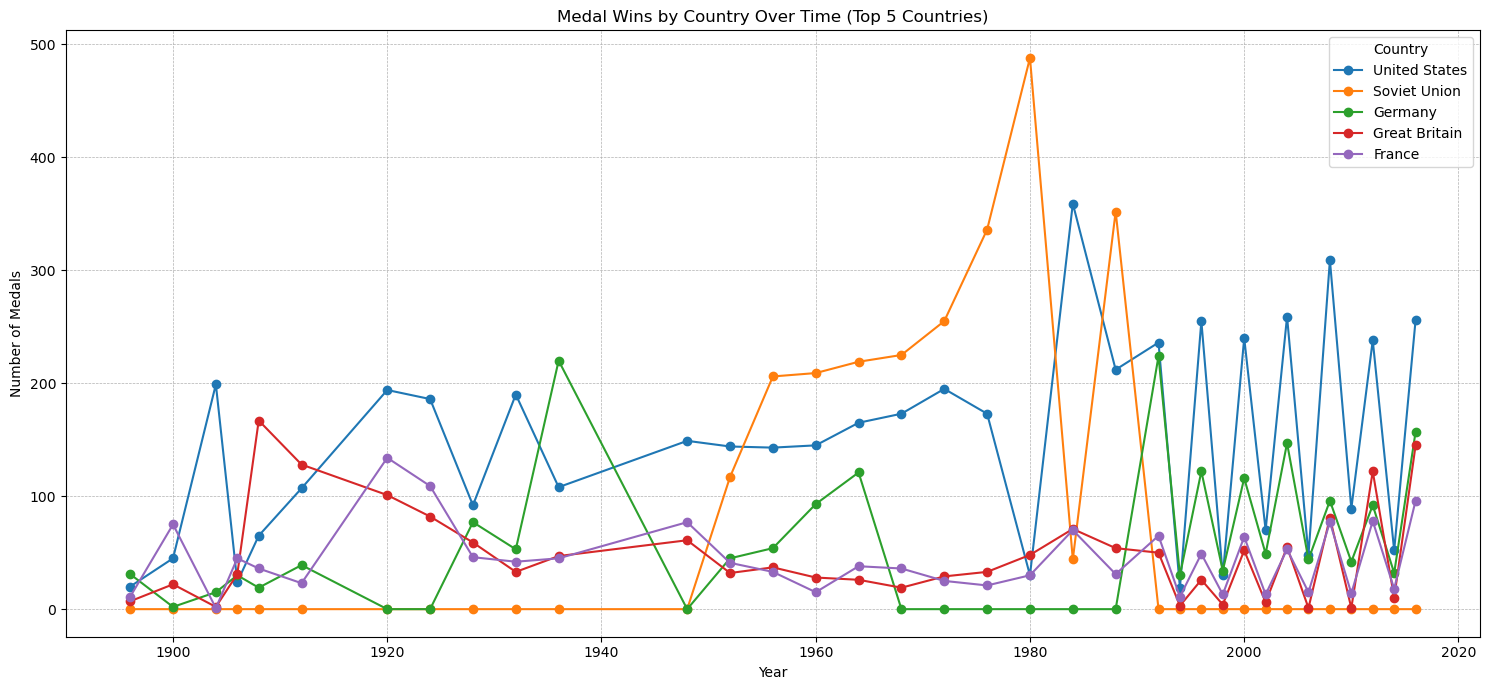

In [53]:
# medals overtime for top countries
medals_overtime = medal_wins.groupby(['Year', 'Team'])['Medal'].count().unstack().fillna(0)[top_countries_medals]

# plot the data
medals_overtime.plot(figsize=(15,7), marker='o', linestyle='-')
plt.title('Medal Wins by Country Over Time (Top 5 Countries)')
plt.ylabel('Number of Medals')
plt.xlabel('Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

##### Top Sports for Medal-Winning Countries 

In [54]:
# top sports in which athletes from top countries have won the most medals
top_sports = df[df['Team'].isin(top_countries_medals) & df['Medal'].isin(['Gold', 'Silver', 'Bronze'])]
top_sports = top_sports.groupby(['Team', 'Sport'])['Medal'].count().reset_index()
top_sports_pivot = top_sports.pivot(index='Sport', columns='Team', values='Medal')
top_sports_pivot = top_sports_pivot.fillna(0)
top_sports_pivot

Team,France,Germany,Great Britain,Soviet Union,United States
Sport,,,,,
Alpine Skiing,45.0,31.0,0.0,1.0,44.0
Alpinism,0.0,2.0,12.0,0.0,0.0
Archery,48.0,7.0,13.0,7.0,41.0
Art Competitions,15.0,26.0,9.0,0.0,9.0
Athletics,110.0,154.0,334.0,242.0,1071.0
...,...,...,...,...,...
Tug-Of-War,0.0,8.0,16.0,0.0,0.0
Volleyball,0.0,0.0,0.0,141.0,120.0
Water Polo,16.0,27.0,21.0,78.0,129.0


In [55]:
# sports in which each of the top countries won the most medals
top_sports_most_medals = top_sports.groupby('Team').apply(lambda x: x.nlargest(1, 'Medal')).reset_index(drop=True)
top_sports_most_medals

,Team,Sport,Medal
0,France,Fencing,310
1,Germany,Rowing,204
2,Great Britain,Athletics,334
3,Soviet Union,Gymnastics,288
4,United States,Athletics,1071


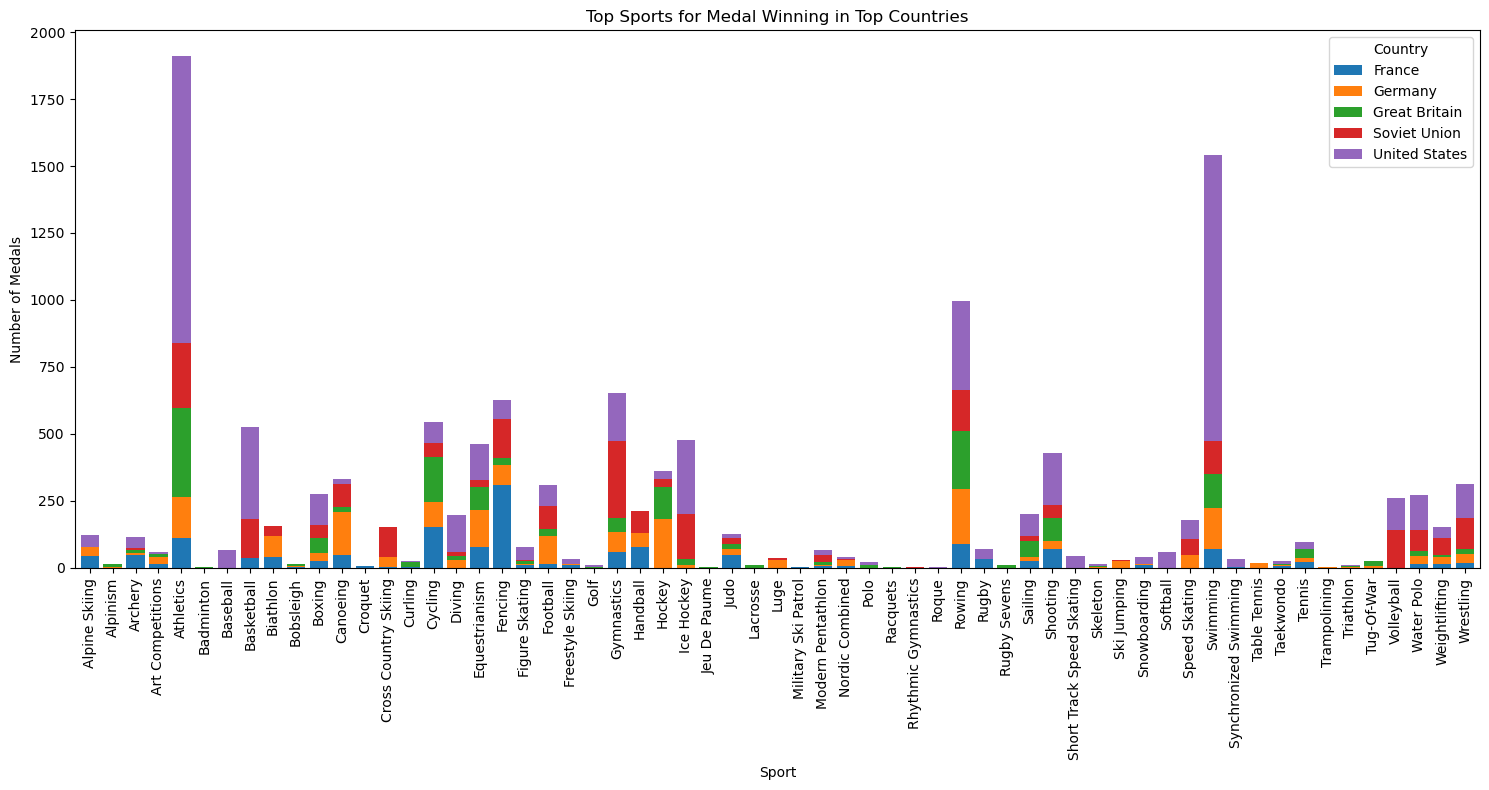

In [56]:
# plot the data
top_sports_pivot.plot(kind='bar', stacked=True, figsize=(15,8), width=0.8)
plt.title('Top Sports for Medal Winning in Top Countries')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.tight_layout()
plt.legend(title='Country')
plt.show()

##### Observations:
- The <span style="color: #069AF3; font-weight: bold;">United States</span> has consistently won a significant number of medals, with peaks in certain years
- The <span style="color: #FFA500; font-weight: bold;">Soviet Union</span>  had a strong presence in medal wins during its existence.
- Countries like <span style="color: #15B01A; font-weight: bold;">Germany</span>, <span style="color: #FF0000; font-weight: bold;">Great Britain</span>, and <span style="color: #DDA0DD; font-weight: bold;">France</span> have also maintained a consistent performance over time.
- **Top sports for top 5 medal-winning countries are**:
    - <span style="color: #069AF3; font-weight: bold;">United States</span>: Athletics  
    - <span style="color: #FFA500; font-weight: bold;">Soviet Union</span>: Gymnastics  
    - <span style="color: #15B01A; font-weight: bold;">Germany</span>: Rowing  
    - <span style="color: #FF0000; font-weight: bold;">Great Britain</span>: Athletics  
    - <span style="color: #DDA0DD; font-weight: bold;">France</span>: Fencing  

#### 4.2 Seasonal Analysis

##### Number of Athletes Over Time by Season

In [57]:
# group & aggregate the dataset by both Year and Season
season_yearly = df.groupby(['Year','Season']).agg({'ID':'nunique', 'Medal':'count'}).reset_index()

In [58]:
# separate the data for Summer and Winter Olympics
summer = season_yearly[season_yearly['Season'] == 'Summer']
winter = season_yearly[season_yearly['Season'] == 'Winter']

In [59]:
# starting year for Summer and Winter Olympics
summer_start = summer['Year'].min()
winter_start = winter['Year'].min()
print(summer_start, winter_start)

1896 1924


In [60]:
# total number of athletes for Summer and Winter Olympics
summer_athletes = summer['ID'].sum()
winter_athletes = winter['ID'].sum()
print(summer_athletes, winter_athletes)

158859 28593


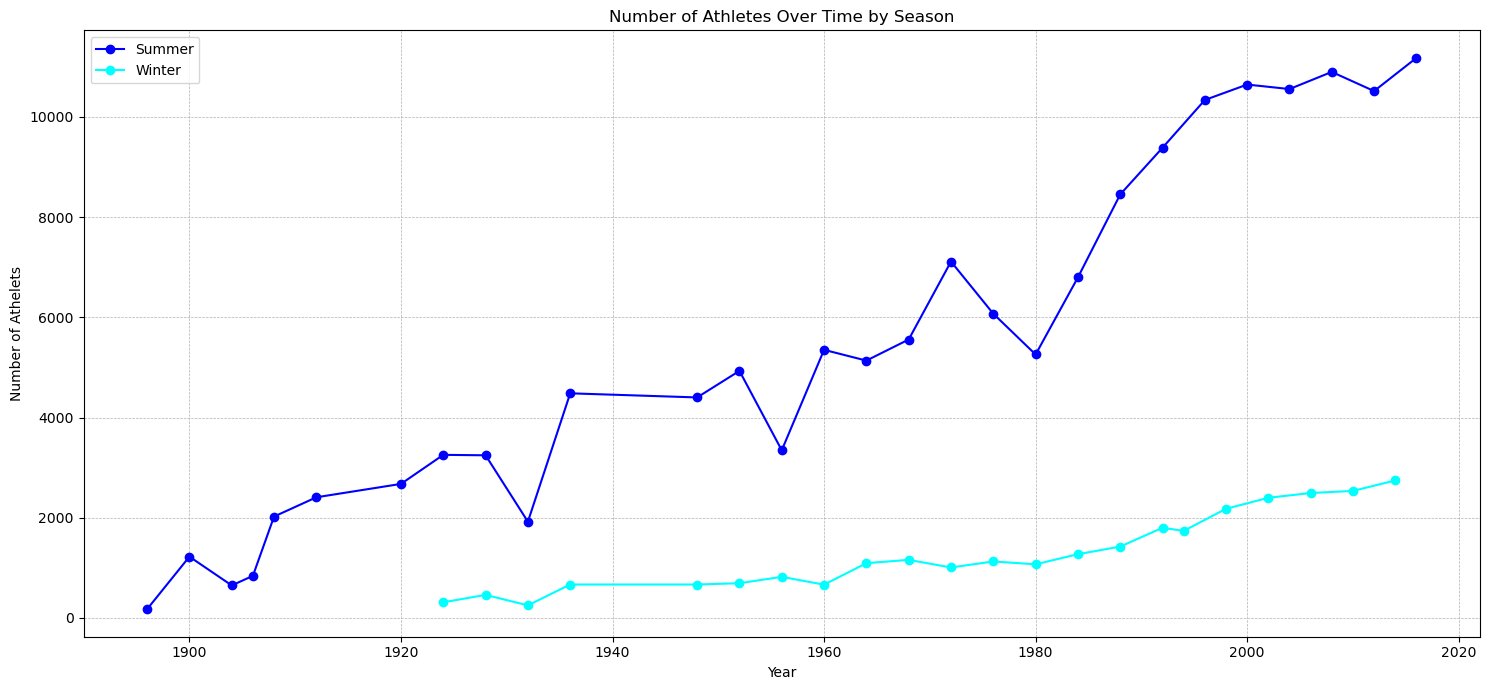

In [61]:
# plot the data
plt.figure(figsize=(15,7))
plt.plot(summer['Year'],summer['ID'], marker='o',linestyle='-', color='blue', label='Summer')
plt.plot(winter['Year'],winter['ID'], marker='o',linestyle='-', color='cyan', label='Winter')
plt.title('Number of Athletes Over Time by Season')
plt.xlabel('Year')
plt.ylabel('Number of Athelets')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

#### Number of Distinct Events by Season

In [62]:
# find out how many distinct events there are by season
distinct_events_by_season = df.groupby('Season')['Event'].nunique()
distinct_events_by_season

Season
Summer    651
Winter    119
Name: Event, dtype: int64

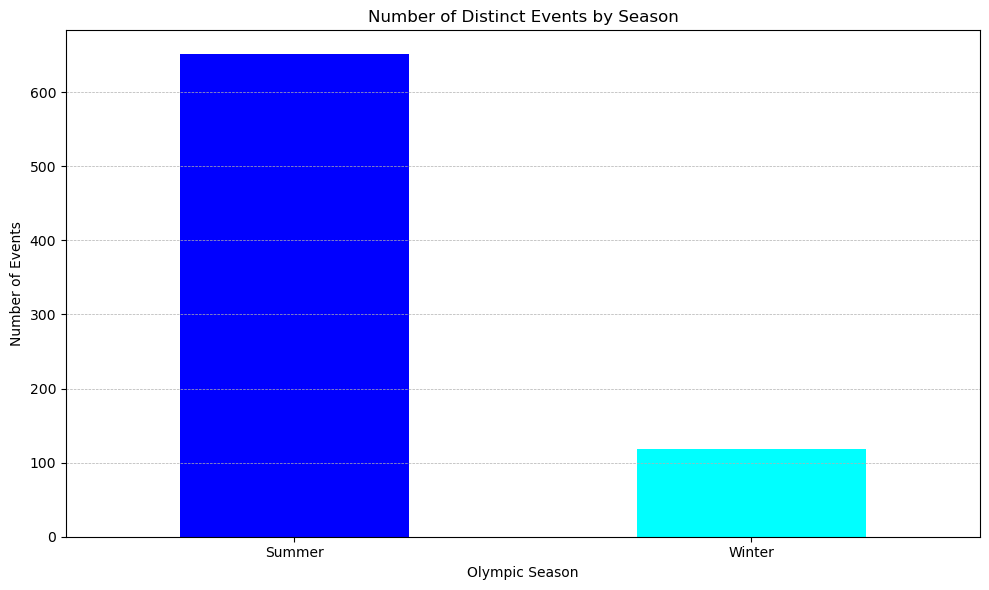

In [63]:
# plot the data
distinct_events_by_season.plot(kind='bar', color=['blue', 'cyan'], figsize = (10,6))
plt.title('Number of Distinct Events by Season')
plt.xlabel('Olympic Season')
plt.ylabel('Number of Events')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

#### Observations:
- <span style="color: #0000FF; font-weight: bold;">Summer</span>  Olympics started in the year 1896, while <span style="color: #00FFFF; font-weight: bold;">Winter</span>  Olympics started in 1924.
- The <span style="color: #0000FF; font-weight: bold;">Summer</span> Olympics saw a total of 158,859 athletes participating across all the years, while the <span style="color: #00FFFF; font-weight: bold;">Winter</span> Olympics had 28,593 athletes in total.
- <span style="color: #0000FF; font-weight: bold;">Summer</span>  Olympics (615 events) have more distinct events than <span style="color: #00FFFF; font-weight: bold;">Winter</span> Olympics (119 events).
- <span style="color: #0000FF; font-weight: bold;">Summer</span> Olympics have a longer history, more athletes, and more distinct events compared to <span style="color: #00FFFF; font-weight: bold;">Winter</span> Olympics.

#### 4.3 Relationship Analysis

##### Define Variable

In [64]:
# define medalists
medalists = df['Medal'].isin(['Gold', 'Silver', 'Bronze'])

##### Medal won vs Age

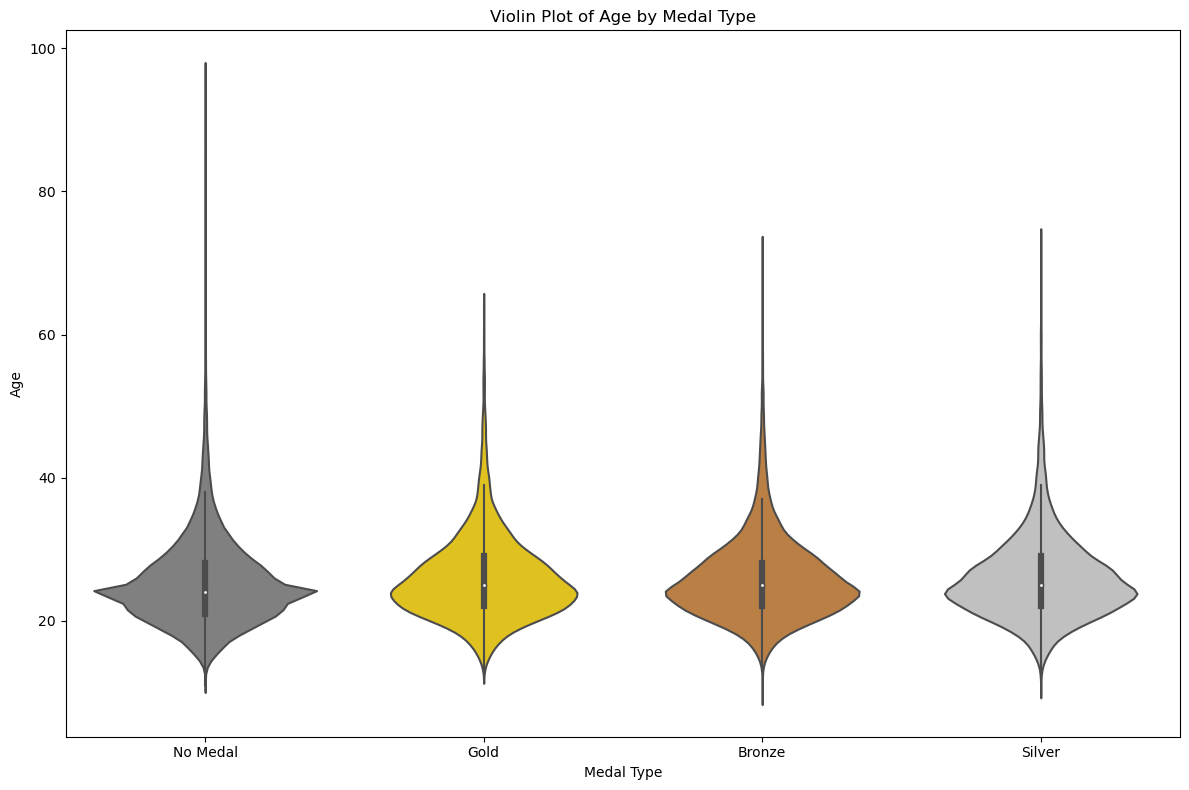

In [65]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Medal', y='Age', palette={'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32', 'No Medal': 'grey'})
plt.title('Violin Plot of Age by Medal Type')
plt.xlabel('Medal Type')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

##### Height vs Weight

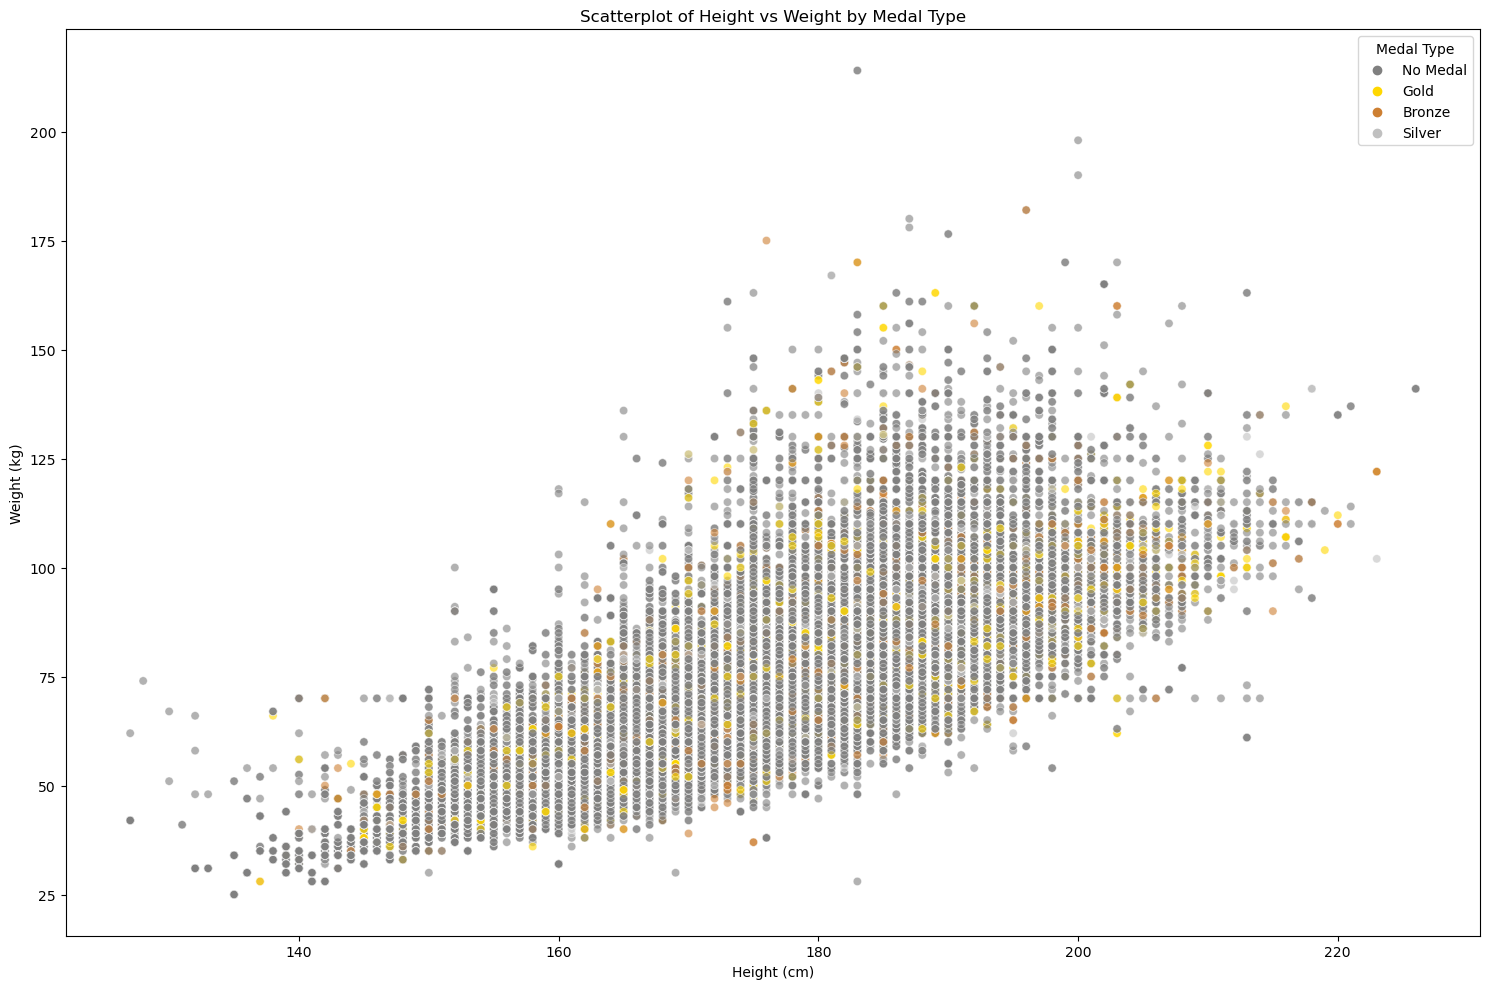

In [66]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='Height', y='Weight', hue='Medal', palette={'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32', 'No Medal': 'grey'}, alpha=0.6)
plt.title('Scatterplot of Height vs Weight by Medal Type')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(title='Medal Type')
plt.tight_layout()
plt.show()

##### Observations:
- **Age vs. Medal**: The median age for medalists seems to be around the mid-20s. The interquartile range is relatively consistent across all the medal categories. Gold medalists tend to be slightly younger than Silver and Bronze medalists. Athletes who didn't win a medal have a slightly higher median age compared to medal winners.
- **Height vs Weight**: As I predicted, there is a linear relationship between height and weight.

#### 4.4 South Korean Athlete Spotlight

##### Define Variables

In [67]:
# define a mask for South Korea-related data
sk = df['Team'] == "South Korea"

# define medalists
medalists = df['Medal'].isin(['Gold', 'Silver', 'Bronze'])

##### Overall Medal Tally

In [68]:
# medal counts for Korean athletes
kor_medal_tally = df[sk]['Medal'].value_counts()
kor_medal_tally

No Medal    3752
Silver       222
Gold         211
Bronze       159
Name: Medal, dtype: int64

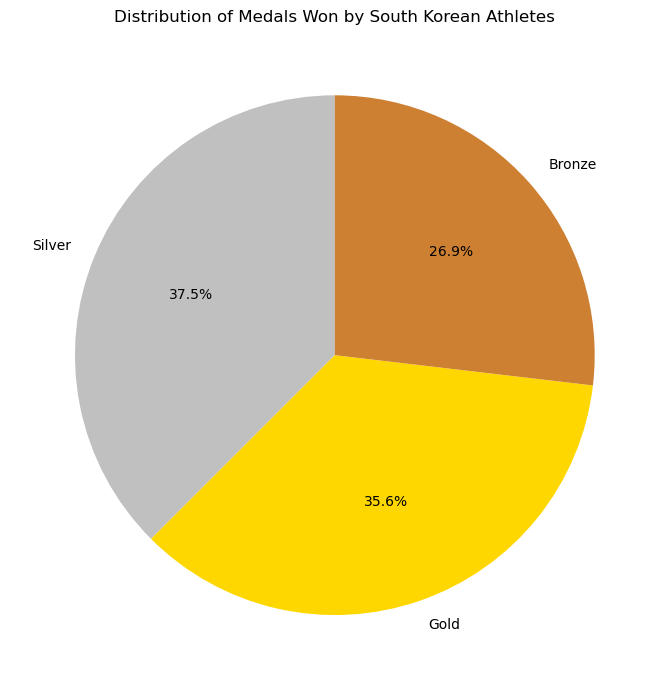

In [69]:
# filtering to consider only rows that have a valid medal and pertain to South Korea
kor_medal_tally = kor_medal_tally[kor_medal_tally.index.isin(['Gold', 'Silver', 'Bronze'])]

# plot the data
medal_colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32'}
kor_medal_tally.plot(kind='pie', figsize=(10,7), autopct='%1.1f%%', startangle=90, colors=[medal_colors.get(medal) for medal in kor_medal_tally.index if medal in medal_colors])
plt.title('Distribution of Medals Won by South Korean Athletes')
plt.ylabel('')
plt.tight_layout()
plt.show()

##### Observations:
Korean athletes have won:   
* <span style="color: #DAA520; font-weight: bold;">211 Gold</span> medals (35.6%) 
* <span style="color: #C0C0C0; font-weight: bold;">222 Silver</span> medals (37.5%) 
* <span style="color: #cd7f32; font-weight: bold;">159 Bronze</span> medals  (26.9%)

##### Participation Over Time

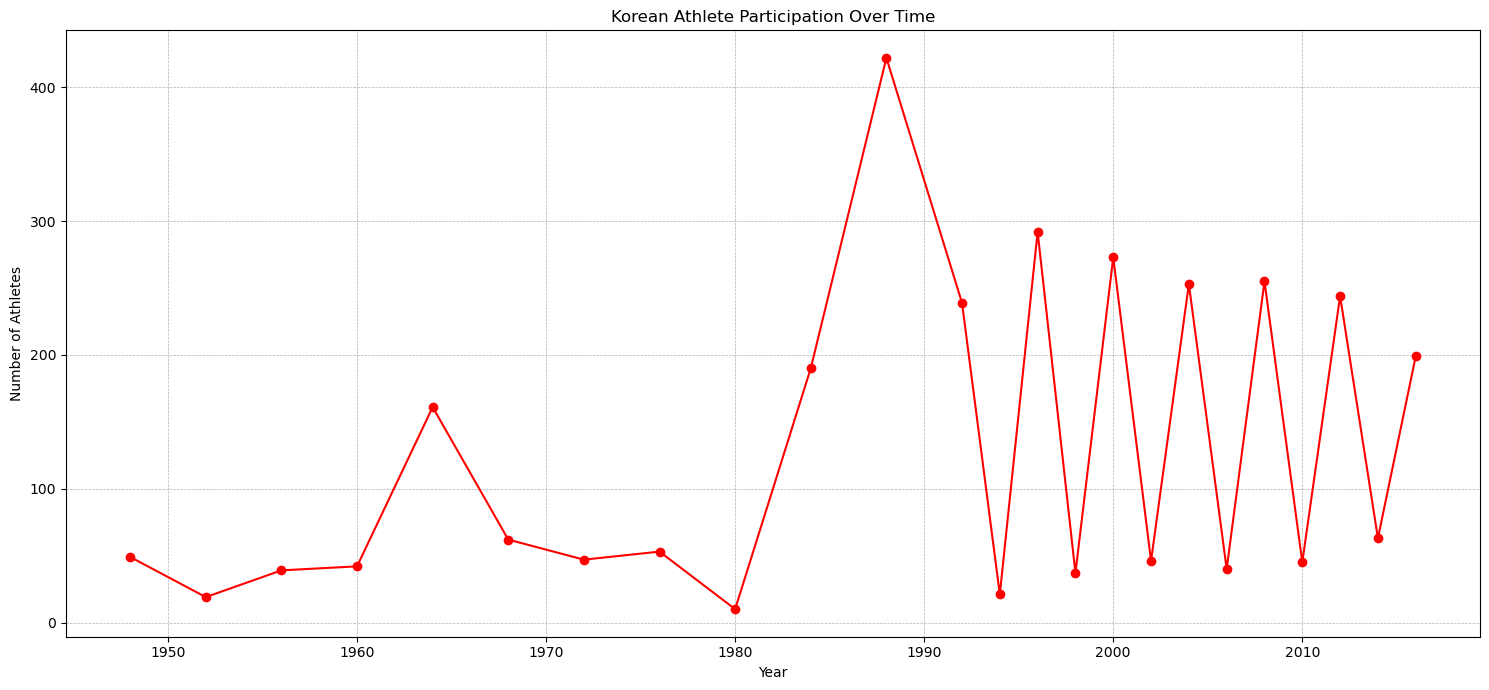

In [70]:
# participation counts for Korean athletes over time
kor_participation = df[sk].groupby('Year')['ID'].nunique()

# plot the data
kor_participation.plot(figsize=(15,7), marker='o', linestyle='-', color = 'red')
plt.title('Korean Athlete Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

##### Observations:
- **Initial Participation**: Korean athletes began their Olympic journey around 1940s.
- **Steady Increase**: Post-1960, there's been a noticeable increase in the number of participating Korean athletes, with peaks corresponding to the Summer Olympics.

##### Top Performers

In [71]:
# top Korean Athletes based on medal counts
kor_top_performers = df[sk & medalists]
kor_top_performers = kor_top_performers.groupby('Name').agg({'Medal': 'count', 'Sport': lambda x: ', '.join(x.unique())}).nlargest(20, 'Medal').reset_index()
kor_top_performers[['Name', 'Sport', 'Medal']]

,Name,Sport,Medal
0,Jin Jong-O,Shooting,6
1,Kim Su-Nyeong,Archery,6
2,Choi Eun-Gyeong,"Hockey, Short Track Speed Skating",5
3,Jeon I-Gyeong,Short Track Speed Skating,5
4,Lee Ho-Seok,Short Track Speed Skating,5
5,Park Seung-Hui,Short Track Speed Skating,5
6,Ki Bo-Bae,Archery,4
7,Oh Seong-Ok,Handball,4
8,Park Seong-Hyeon,Archery,4
9,Park Tae-Hwan,Swimming,4


##### Observations:
- Korean athletes seem to excel in particular sports, namely **"Short Track Speed Skating," "Archery,"** and **"Handball."**
- There are some exceptional athletes like **Jin Jong-O** and **Park Tae-Hwan** who have won medals in sports that are not typically associated with Koreans' strong performance, such as shooting and swimming.


##### Sport Distribution

In [72]:
# top sports in which Korean athletes have won medals
kor_sport_distribution = df[sk & medalists]
kor_sport_distribution = kor_sport_distribution.groupby('Sport').agg({'Medal': 'count', 'Season': 'first'}).nlargest(10,'Medal').reset_index()
kor_sport_distribution[['Sport', 'Season', 'Medal']]

,Sport,Season,Medal
0,Handball,Summer,96
1,Short Track Speed Skating,Winter,73
2,Archery,Summer,69
3,Baseball,Summer,48
4,Hockey,Summer,48
5,Judo,Summer,43
6,Wrestling,Summer,36
7,Boxing,Summer,20
8,Fencing,Summer,20
9,Taekwondo,Summer,19


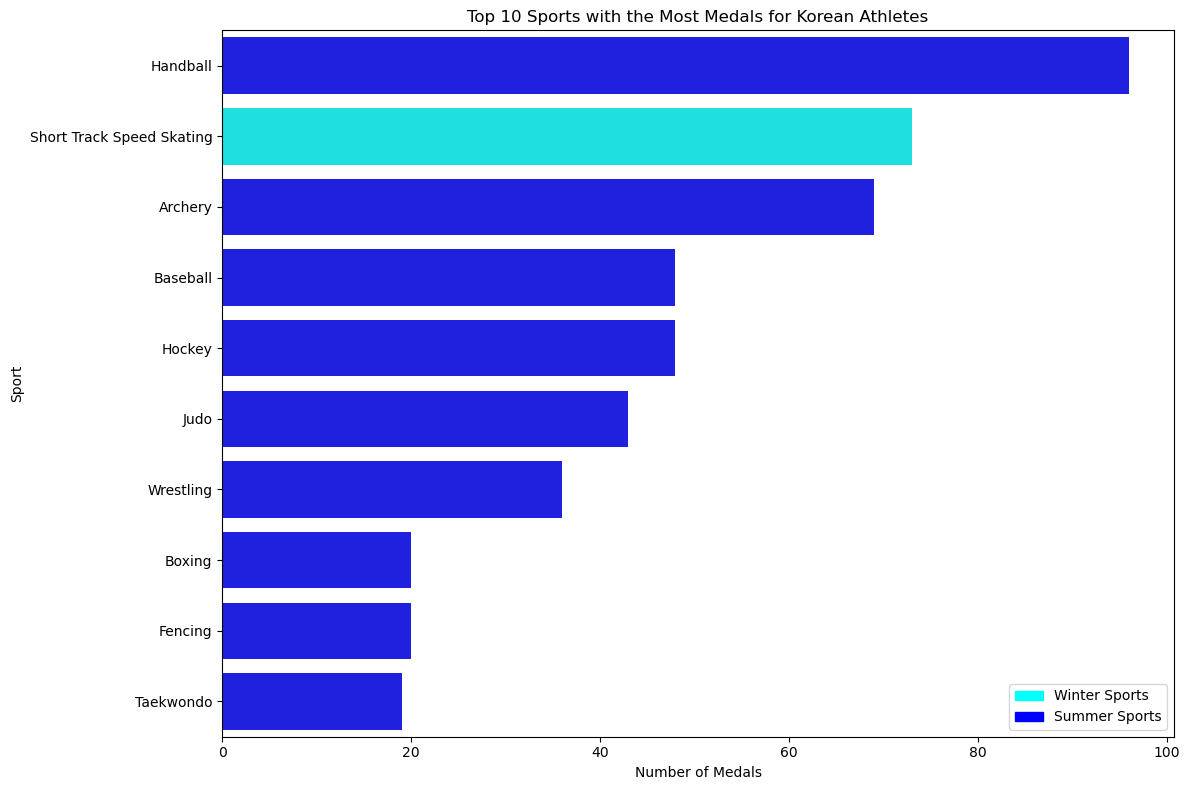

In [73]:
# plot the data
palette = {'Short Track Speed Skating': 'cyan', 
                    **{sport: 'blue' for sport in kor_sport_distribution['Sport'] if sport != 'Short Track Speed Skating'}}

plt.figure(figsize=(12, 8))
sns.barplot(data=kor_sport_distribution.sort_values(by='Medal', ascending=False), 
            y='Sport', 
            x='Medal', 
            palette=palette)
plt.title('Top 10 Sports with the Most Medals for Korean Athletes')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')

winter_patch = mpatches.Patch(color='cyan', label='Winter Sports')
summer_patch = mpatches.Patch(color='blue', label='Summer Sports')
plt.legend(handles=[winter_patch, summer_patch], loc="lower right")

plt.tight_layout()
plt.show()

##### Observations:
- Korean athletes seem to excel in <span style="color: #0000FF; font-weight: bold;">summer</span> sports compared to <span style="color: #00FFFF; font-weight: bold;">winter</span> sports. However, this discrepancy could be attributed to the historical context we observed in the previous seasonal analysis, which indicated a greater number of <span style="color: #0000FF; font-weight: bold;">summer</span> sports.

##### Gender Analysis

In [74]:
# gender distribution and medal count for Korean athletes
kor_gender = df[sk].groupby('Sex')['ID'].nunique()
kor_gender_medal = df[sk & medalists].groupby('Sex')['Medal'].count()
kor_gender_distribution = pd.DataFrame({'Number of Athletes': kor_gender, 'Number of Medals': kor_gender_medal})
kor_gender_distribution

,Number of Athletes,Number of Medals
Sex,,
F,820,272
M,1533,320


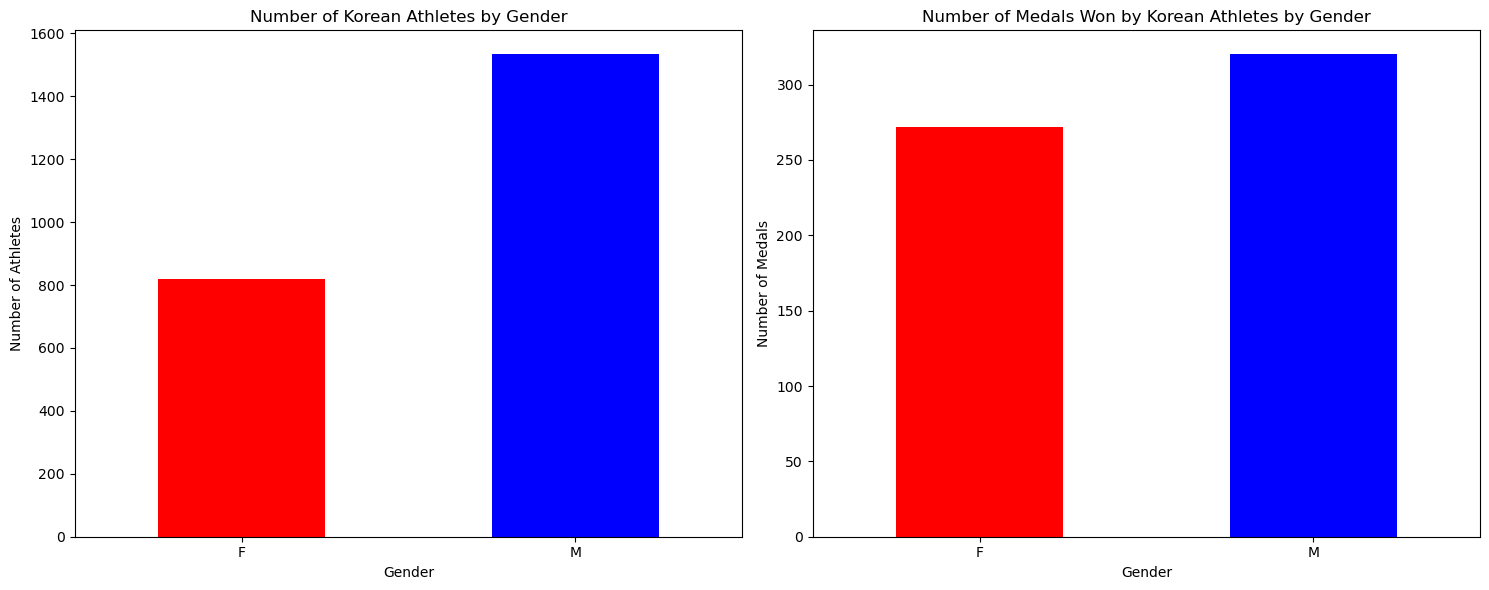

In [75]:
# plot the data
colors = {'F': 'red', 'M': 'blue'}
fig, axes = plt.subplots(1, 2, figsize = (15,6))

# Number of Athletes by Gender
kor_gender_distribution['Number of Athletes'].plot(kind='bar', ax=axes[0], color=[colors[gender] for gender in kor_gender_distribution.index])
axes[0].set_title('Number of Korean Athletes by Gender')
axes[0].set_ylabel('Number of Athletes')
axes[0].set_xlabel('Gender')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Number of Medals by Gender
kor_gender_distribution['Number of Medals'].plot(kind='bar', ax=axes[1], color=[colors[gender] for gender in kor_gender_distribution.index])
axes[1].set_title('Number of Medals Won by Korean Athletes by Gender')
axes[1].set_ylabel('Number of Medals')
axes[1].set_xlabel('Gender')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

##### Observations:
- While there have been more <span style="color: #0000FF; font-weight: bold;">male</span>  athletes representing Korea in the Olympics, the medal count between <span style="color: #0000FF; font-weight: bold;">male</span>  and <span style="color: #FF0000; font-weight: bold;">female</span>  athletes is relatively close.

##### Age Distribution

In [76]:
# age distribution and medal count based on age for Korean athletes
kor_age = df[sk]['Age'].dropna()
kor_age_medal = df[sk & medalists]['Age'].dropna()

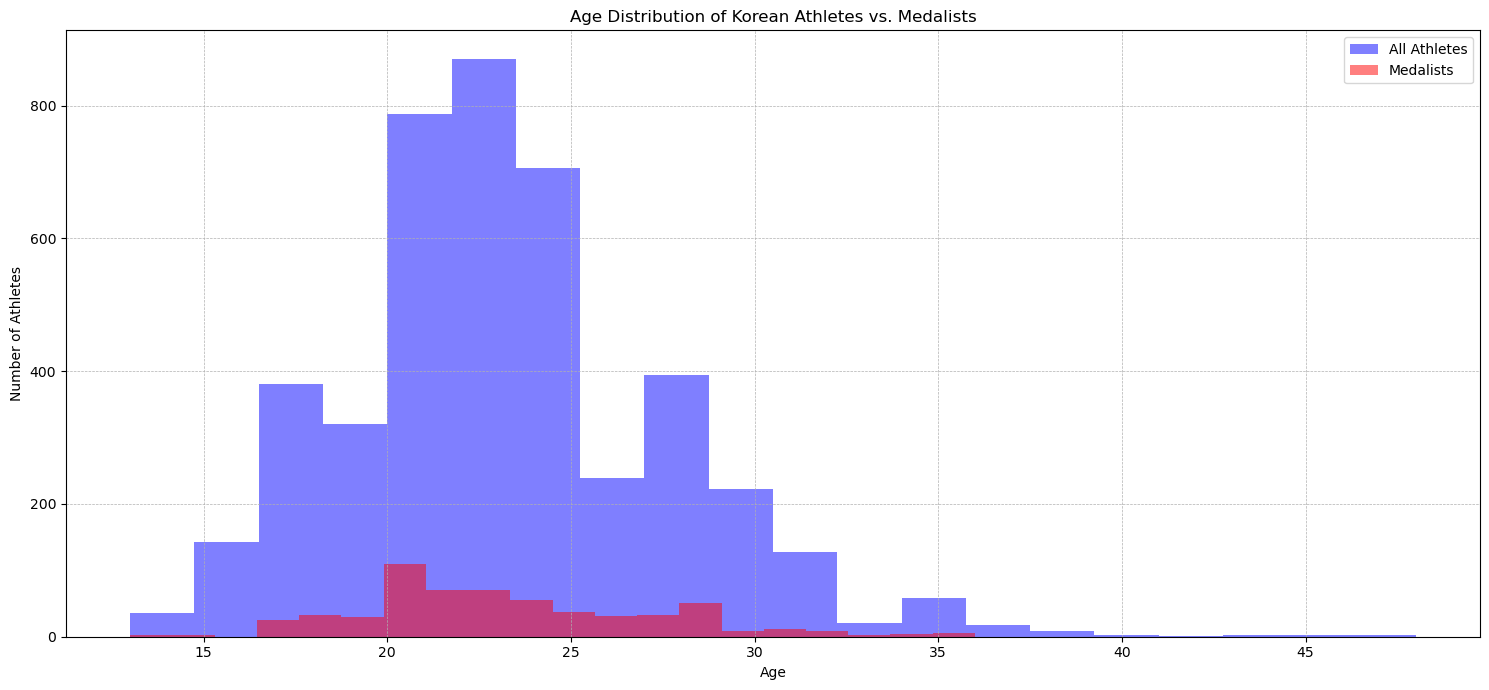

In [77]:
# plot the data
plt.figure(figsize=(15,7))
plt.hist(kor_age, bins=20, alpha=0.5, color='blue', label='All Athletes')
plt.hist(kor_age_medal, bins=20, alpha=0.5, color='red', label='Medalists')
plt.title('Age Distribution of Korean Athletes vs. Medalists')
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

##### Observations:  
- The majority of Korean athletes, including medalists, fall within the age range of approximately **20 to 30** years.
- Athletes in their **early to mid-twenties** seem to have the highest medal-winning rate.
- There are fewer athletes and medalists in the age groups beyond 30, indicating that younger athletes tend to dominate in terms of participation and performance.

In [78]:
df.to_csv('eda_data.csv', index=False)

# 5

## Feature Engineering

#### 5.1 Create Binary Target Column for Medals


In [79]:
df['Medal_Won'] = df['Medal'].apply(lambda x: 1 if x in ['Gold', 'Silver', 'Bronze'] else 0)

#### 5.2 Create Feature to Reduce Multicollinearity

In [80]:
df['BMI'] = df['Weight'] / (df['Height']/100)**2

# 6

## Data Pre-Processing

#### 6.1 Drop Unnecessary Columns

In [81]:
df.drop(columns=['ID', 'Name', 'Games', 'region', 'notes', 'Event', 'City', 'Team', 'Weight', 'Height'], inplace=True, errors='ignore')

#### 6.2 Handle Missing Values

In [82]:
# fill with mode where possible
cols = df.columns[df.isnull().any()].tolist()
for col in cols:
    mode_series = df[col].mode()
    if not mode_series.empty:
        mode_value = mode_series[0]
        df[col].fillna(mode_value, inplace=True)
        
# fill remaining columns with default 0
df['Sex'].fillna(0, inplace=True)
df['Season'].fillna(0, inplace=True)

#### 6.3 Binary and One-hot Encoding

In [83]:
# map values
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})
df['Season'] = df['Season'].map({'Summer': 0, 'Winter': 1})

# apply one-hot encoding
cols_to_encode = ['NOC', 'Sport', 'Season', 'Sex']
df_encoded = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)
df_encoded.drop(columns=['Medal'], inplace=True, errors='ignore')
df_encoded.head()

,Age,Year,Medal_Won,BMI,NOC_AHO,NOC_ALB,NOC_ALG,NOC_AND,NOC_ANG,NOC_ANT,...,Sport_Tennis,Sport_Trampolining,Sport_Triathlon,Sport_Tug-Of-War,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling,Season_1,Sex_1
0,24.0,1992,0,24.691358,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,23.0,2012,0,20.761246,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24.0,1920,0,22.857143,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.0,1900,1,22.857143,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,21.0,1988,0,23.959094,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


# 7

## Model Selection and Training

In [84]:
# filter dataset for years 2000 onwards
df_recent = df_encoded[df_encoded['Year']>=2000]

# split data into training and test sets
X_recent = df_recent.drop('Medal_Won', axis=1)
y_recent = df_recent['Medal_Won']
X_train_recent, X_test_recent, y_train_recent, y_test_recent = train_test_split(x_recent, y_recent, test_size=0.2, random_state=42)

# train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_recent, y_train_recent)

RandomForestClassifier(random_state=42)

# 8

## Model Evaluation

In [85]:
# predict and calculate accuracy
y_pred_recent = rf_model.predict(X_test_recent)
accuracy_recent = accuracy_score(y_test_recent, y_pred_recent)

print(f"Accuracy: {accuracy_recent:.2f}")

Accuracy: 0.89


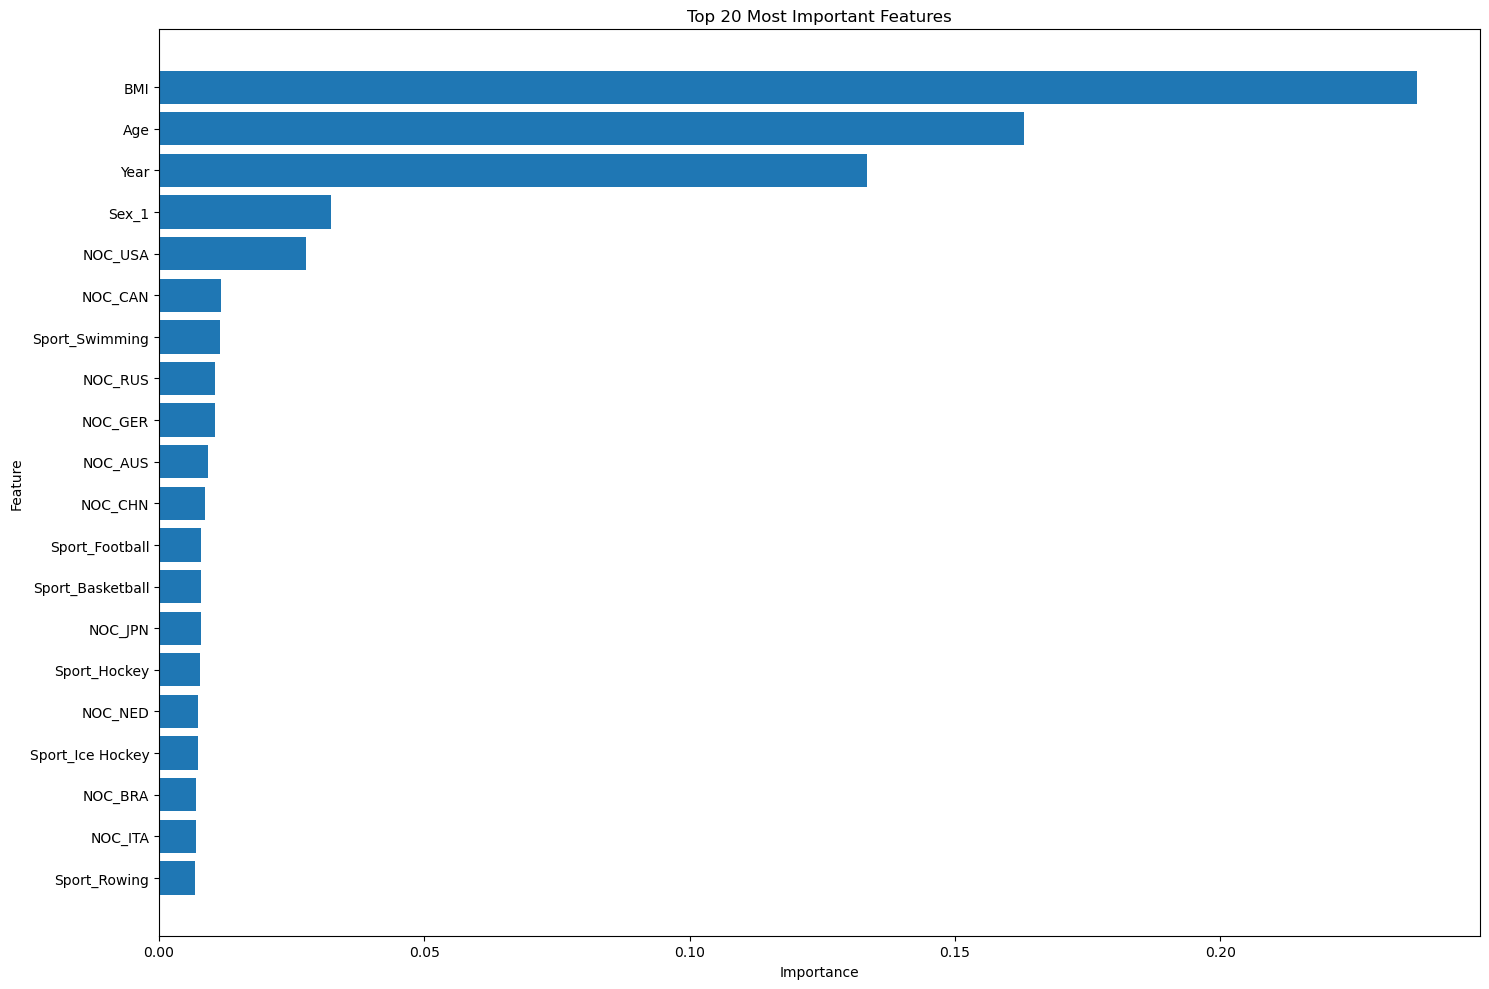

In [86]:
# extract feature importance from model
features = rf_model.feature_importances_

# create df for visualization
features_df = pd.DataFrame({'Feature': X_recent.columns, 'Importance': features})

# sort features based on importance
features_df = features_df.sort_values(by="Importance", ascending=False)

# plot the top 20 most important features
plt.figure(figsize=(15,10))
plt.barh(features_df['Feature'][:20], features_df['Importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features')
plt.gca().invert_yaxis() # display the most important feature at top
plt.tight_layout()
plt.show()

# 9

## Conclusion
**Model Accuracy**
1. The Random Forest model predicts medal winnings based on various athlete and event data.
2. An accuracy of 89% implies the model correctly predicted whether an athlete won a medal in 89 out of every 100 predictions on the test set.

**Contextual Understanding**
1. Certain features, such as age, height, weight (or BMI), country, and sport, have strong correlations with medal outcomes. However, it's important to note that correlation doesn't mean causation. These features don't necessarily "cause" an athlete to win a medal.

**Feature Importance**
1. The prominence of BMI in the feature importance suggests that the combined effect of an athlete's height and weight significantly impacts their likelihood of winning a medal. This combination captures a holistic aspect of an athlete's physique, which plays a pivotal role in many sports. For example, sports that require agility and speed might favor athletes with a lower BMI, while strength-based events could favor those with a higher BMI.
2. Age's significance suggests it's a pivotal factor in athletic performance, influencing aspects like stamina, recovery, and experience. Some sports might favor younger athletes, while others might benefit from more experienced participants.
3. The 'Year' feature's significance suggests that factors such as advancements in training techniques, sports technology, or even global events might influence medal outcomes over time.
4. The significance of NOC-related features highlights the potential influence of an athlete's representing country or region on their medal-winning prospects.
5. Other features, such as the type of sport and the season of the games (summer or winter), also contribute to the model's predictions.

**Further Considerations**
1. Since the model is trained on data from 2000 onwards, it is tailored for recent Olympic events. Predictions for earlier or much later events might not be as accurate due to evolving contexts.
2. External factors, not captured in the dataset, can influence outcomes. Elements like an athlete's specific training regimen, prior injuries, mental state, or even changes in competition rules, can play a significant role in actual outcomes but are not included in the model.